In [1]:
import cdsapi
import requests
import os
from astral.sun import sun
from astral import LocationInfo
import time
from geopy.geocoders import Nominatim
import pandas as pd
import xarray as xr
import pygrib
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from datetime import datetime, timedelta



In [2]:
#What a permaculture project need to know when they start
# select the years you want to download:
start_year = 1992
end_year = 2022
year_range = [i for i in range(start_year, end_year + 1)]
print(year_range)

# Use geopy to get the latitude and longitude of the city
geolocator = Nominatim(user_agent="permaculture-climate")
location = geolocator.geocode("Puebla de don Fadrique, Spain")
# Add a delay between requests
time.sleep(1)

[1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


In [ ]:




c = cdsapi.Client()
try:
    data = c.retrieve("reanalysis-era5-single-levels-monthly-means",
    {"format": "grib",
     "product_type": "monthly_averaged_reanalysis_by_hour_of_day",
     "variable": ['10m_u_component_of_wind', '10m_v_component_of_wind', 
                '2m_temperature',
                'total_cloud_cover', 
                'total_precipitation',
                ],
    "area": [location.latitude + 1, 
             location.longitude - 1, 
             location.latitude - 1, 
             location.longitude + 1],  # North, West, South, East. 
    "year": year_range,
    "month": ['01', '02', '03',
           '04', '05', '06',
           '07', '08', '09',
           '10', '11', '12'],
    "time": ["00:00","01:00","02:00","03:00","04:00","05:00",
             "06:00","07:00","08:00","09:00","10:00","11:00",
             "12:00", "13:00","14:00","15:00","16:00","17:00",
             "18:00","19:00","20:00","21:00","22:00","23:00"]
    })

    # Get the location of the file to download
    url = data.location

    # Download the file
    response = requests.get(url)

    # Check if the request was successful
    response.raise_for_status()

except requests.exceptions.HTTPError as errh:
    print ("HTTP Error:",errh)
except requests.exceptions.ConnectionError as errc:
    print ("Error Connecting:",errc)
except requests.exceptions.Timeout as errt:
    print ("Timeout Error:",errt)
except requests.exceptions.RequestException as err:
    print ("Something went wrong with the request:",err)

else:
    # If the request was successful, write the file
    filename = 'download.grib'
    with open(filename, 'wb') as f:
        f.write(response.content)

    # Print the location where the file is saved
    print(f"File saved at: {os.path.abspath(filename)}")

In [ ]:
#temperatura durante l'anno 
#precipitaciones durante l'anno
#vento durante l'anno (rosa dei venti)

In [35]:
# Open the GRIB file
grbs = pygrib.open('download.grib')

# Select the 'Total cloud cover' variable
total_cloud_cover = [grb for grb in grbs if grb.name == 'Total cloud cover']

# Print the first instance of 'Total cloud cover'
print(total_cloud_cover[0])

# Get the data values for the first instance of 'Total cloud cover'
data_values = total_cloud_cover

# Print the data values
print(data_values)


7:Total cloud cover:(0 - 1) (avgua):regular_ll:surface:level 0:fcst time 0 hrs (avgua):from 199201010000
[7:Total cloud cover:(0 - 1) (avgua):regular_ll:surface:level 0:fcst time 0 hrs (avgua):from 199201010000, 15:Total cloud cover:(0 - 1) (avgua):regular_ll:surface:level 0:fcst time 0 hrs (avgua):from 199201010100, 23:Total cloud cover:(0 - 1) (avgua):regular_ll:surface:level 0:fcst time 0 hrs (avgua):from 199201010200, 31:Total cloud cover:(0 - 1) (avgua):regular_ll:surface:level 0:fcst time 0 hrs (avgua):from 199201010300, 39:Total cloud cover:(0 - 1) (avgua):regular_ll:surface:level 0:fcst time 0 hrs (avgua):from 199201010400, 47:Total cloud cover:(0 - 1) (avgua):regular_ll:surface:level 0:fcst time 0 hrs (avgua):from 199201010500, 55:Total cloud cover:(0 - 1) (avgua):regular_ll:surface:level 0:fcst time 0 hrs (avgua):from 199201010600, 63:Total cloud cover:(0 - 1) (avgua):regular_ll:surface:level 0:fcst time 0 hrs (avgua):from 199201010700, 71:Total cloud cover:(0 - 1) (avgua):re

In [29]:
import xarray as xr

# List of variables to load
variables = ['Total cloud cover', '10 metre V wind component', 
             '2 metre temperature', 'Total precipitation', '10 metre U wind component']

# Dictionary to hold the datasets
datasets = {}

# Open the GRIB file for each variable
for var in variables:
    ds = xr.open_dataset('download.grib', engine='cfgrib', backend_kwargs={'filter_by_keys': {'parameterName': var}})
    datasets[var] = ds

# Print the datasets
for var, ds in datasets.items():
    print(f"{var}:")
    print(ds)
    print("\n")
    


Ignoring index file 'download.grib.dc8f2.idx' older than GRIB file
Ignoring index file 'download.grib.dc8f2.idx' older than GRIB file
Ignoring index file 'download.grib.dc8f2.idx' older than GRIB file
Ignoring index file 'download.grib.dc8f2.idx' older than GRIB file
Ignoring index file 'download.grib.dc8f2.idx' older than GRIB file
Ignoring index file 'download.grib.dc8f2.idx' older than GRIB file
Ignoring index file 'download.grib.dc8f2.idx' older than GRIB file


Total cloud cover:
<xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*
Attributes:
    Conventions:  CF-1.7
    history:      2023-11-26T16:26 GRIB to CDM+CF via cfgrib-0.9.10.4/ecCodes...


Soil temperature level 1:
<xarray.Dataset>
Dimensions:              (time: 8928, latitude: 9, longitude: 9)
Coordinates:
    number               int32 ...
  * time                 (time) datetime64[ns] 1992-01-01 ... 2022-12-01T23:0...
    step                 timedelta64[ns] ...
    depthBelowLandLayer  float64 ...
  * latitude             (latitude) float64 38.96 38.71 38.46 ... 37.21 36.96
  * longitude            (longitude) float64 -3.435 -3.185 ... -1.684 358.6
    valid_time           (time) datetime64[ns] ...
Data variables:
    stl1                 (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Con

In [30]:
# Print the units for 'Total precipitation'
print(f"Units for Total precipitation: {ds.tp.units}")

AttributeError: 'Dataset' object has no attribute 'tp'

In [42]:
import pandas as pd
# Check if the time values for Total precipitation are always 6 and 18
time_values = pd.to_datetime(datasets['Total precipitation']['time'].values)
valid_times = [time for time in time_values if time.hour not in [6, 18]]

# Print the result
if valid_times:
    print(f"The following time values for Total precipitation are not 6 or 18: {valid_times}")
else:
    print("All time values for Total precipitation are 6 or 18.")

len(time_values)


All time values for Total precipitation are 6 or 18.


1116

In [ ]:
# Calculate the climatology and average over latitude and longitude
precip_climatology = datasets['Total precipitation']['tp'].groupby('time.month').mean(['time', 'latitude', 'longitude', 'step'])*1000
# Calculate the average, maximum, and minimum temperature
avg_temp = datasets['2 metre temperature']['t2m'].groupby('time.month').mean(['time', 'latitude', 'longitude'])-273.15
max_temp = datasets['2 metre temperature']['t2m'].groupby('time.month').max(['time', 'latitude', 'longitude'])-273.15
min_temp = datasets['2 metre temperature']['t2m'].groupby('time.month').min(['time', 'latitude', 'longitude'])-273.15

#check the diemsnsions of the data
print(temp_climatology.dims)
print(precip_climatology.dims)


In [ ]:
# Create a Plotly figure
fig = go.Figure()

# Add a bar chart for precipitation
fig.add_trace(go.Bar(
    x=precip_climatology.month,
    y=precip_climatology,
    name='Precipitation',
    # Set the y-axis to be on the right side
    yaxis='y2'
))

# Add a line chart for temperature
fig.add_trace(go.Scatter(
    x=avg_temp.month,
    y=avg_temp,
    mode='lines',
    name='Temperature',
))

# Set the layout to have two y-axes
fig.update_layout(
    yaxis=dict(title='Temperature'),
    yaxis2=dict(title='Precipitation', overlaying='y', side='right')
)

# Show the figure
fig.show()

In [ ]:

# Create a Plotly figure
fig = go.Figure()

# Add a line chart for average temperature
fig.add_trace(go.Scatter(
    x=avg_temp.month,
    y=avg_temp,
    mode='lines',
    name='Average Temperature'
))

# Add a shaded area for min-max temperature
fig.add_trace(go.Scatter(
    x=max_temp.month,
    y=max_temp,
    mode='lines',
    name='Max Temperature',
    line_color='red',
    fill=None
))

fig.add_trace(go.Scatter(
    x=min_temp.month,
    y=min_temp,
    mode='lines',
    name='Min Temperature',
    line_color='red',
    fill='tonexty'
))

# Set the layout
fig.update_layout(
    xaxis=dict(title='Month'),
    yaxis=dict(title='Temperature (°C)'),
    title='Average Temperature Data'
)

# Show the figure
fig.show()


In [ ]:
# Calculate the temperature difference
temp_diff = max_temp - min_temp

# Create a Plotly figure
fig = go.Figure()

# Add a line chart for temperature difference
fig.add_trace(go.Scatter(
    x=temp_diff.month,
    y=temp_diff,
    mode='lines',
    name='Temperature Difference'
))

# Set the layout
fig.update_layout(
    xaxis=dict(title='Month'),
    yaxis=dict(title='Temperature Difference (°C)'),
    title='Temperature Difference Data'
)

# Show the figure
fig.show()

In [ ]:
# Create a Plotly figure
fig = go.Figure()

# Add a bar chart for min-max temperature
fig.add_trace(go.Bar(
    x=min_temp.month,
    y=max_temp - min_temp,
    base=min_temp,
    name='Min-Max Temperature'
))

# Set the layout
fig.update_layout(
    xaxis=dict(title='Month'),
    yaxis=dict(title='Temperature (°C)'),
    title='Min-Max Temperature Data'
)

# Show the figure
fig.show()

In [ ]:
# Subtract the average temperature from min and max temperatures
min_temp_adj = min_temp - avg_temp
max_temp_adj = max_temp - avg_temp

# Create a Plotly figure
fig = go.Figure()

# Add a bar chart for adjusted min-max temperature
fig.add_trace(go.Bar(
    x=min_temp_adj.month,
    y=max_temp_adj - min_temp_adj,
    base=min_temp_adj,
    name='Adjusted Min-Max Temperature'
))

# Set the layout
fig.update_layout(
    xaxis=dict(title='Month'),
    yaxis=dict(title='Temperature Difference from Average (°C)'),
    title='Adjusted Min-Max Temperature Data'
)

# Show the figure
fig.show()

In [ ]:
#wind direction

In [ ]:
#soil temperature

In [107]:



#HERE EXTRRACT CLOUD COVER VALUES

c = cdsapi.Client()
try:
    data = c.retrieve("reanalysis-era5-single-levels-monthly-means",
    {"format": "grib",
     "product_type": "monthly_averaged_reanalysis_by_hour_of_day",
     "variable": ['total_cloud_cover', 
                ],
    "area": [location.latitude + 1, 
             location.longitude - 1, 
             location.latitude - 1, 
             location.longitude + 1],  # North, West, South, East. 
    "year": year_range,
    "month": ['01', '02', '03',
           '04', '05', '06',
           '07', '08', '09',
           '10', '11', '12'],
    "time": ["00:00","01:00","02:00","03:00","04:00","05:00",
             "06:00","07:00","08:00","09:00","10:00","11:00",
             "12:00", "13:00","14:00","15:00","16:00","17:00",
             "18:00","19:00","20:00","21:00","22:00","23:00"]
    })

    # Get the location of the file to download
    url = data.location

    # Download the file
    response = requests.get(url)

    # Check if the request was successful
    response.raise_for_status()

except requests.exceptions.HTTPError as errh:
    print ("HTTP Error:",errh)
except requests.exceptions.ConnectionError as errc:
    print ("Error Connecting:",errc)
except requests.exceptions.Timeout as errt:
    print ("Timeout Error:",errt)
except requests.exceptions.RequestException as err:
    print ("Something went wrong with the request:",err)

else:
    # If the request was successful, write the file
    filename = 'download_cloud_data.grib'
    with open(filename, 'wb') as f:
        f.write(response.content)

    # Print the location where the file is saved
    print(f"File saved at: {os.path.abspath(filename)}")

2023-11-27 17:12:53,613 INFO Welcome to the CDS
2023-11-27 17:12:53,617 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels-monthly-means
2023-11-27 17:12:53,808 INFO Request is completed


File saved at: c:\Users\matthias\Documents\Projects\permaculture-climate\download_cloud_data.grib


In [3]:
# Open the GRIB file
import pygrib

# Open the GRIB file
grbs = pygrib.open('download_cloud_data.grib')

# Read the names of the variables
variable_names_clouds = [grb.name for grb in grbs]

# Convert the set to a list
unique_variable_names_clouds = list(set(variable_names_clouds))

# Print the variable names
print(unique_variable_names_clouds)

['Total cloud cover']


In [3]:
import xarray as xr

# List of variables to load


# Dictionary to hold the datasets
datasets_clouds = {}

# Open the GRIB file for each variable
ds_c = xr.open_dataset('download_cloud_data.grib', engine='cfgrib')
#datasets_clouds[var] = ds_c

# Print the datasets
for var, ds in ds_c.items():
    print(f"{ds_c}:")
    print(ds_c)
    print("\n")

Ignoring index file 'download_cloud_data.grib.923a8.idx' older than GRIB file


<xarray.Dataset>
Dimensions:     (time: 8928, latitude: 9, longitude: 9)
Coordinates:
    number      int32 ...
  * time        (time) datetime64[ns] 1992-01-01 ... 2022-12-01T23:00:00
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 38.96 38.71 38.46 38.21 ... 37.46 37.21 36.96
  * longitude   (longitude) float64 -3.435 -3.185 -2.935 ... -1.934 -1.684 358.6
    valid_time  (time) datetime64[ns] ...
Data variables:
    tcc         (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-12-01T12:26 GRIB to CDM+CF via cfgrib-0.9.1...:
<xarray.Dataset>
Dimensions:     (time: 8928, latitude: 9, longitude: 9)
Coordinates:
   

In [4]:
#Get rid of the latitude and longitude dimensions by averaging the data
avg_tcc = ds_c['tcc'].mean(dim=['longitude', 'latitude'])


#Now average the data of each hour of each month across the 30 years of data. We end up with 288 data points, representing 24 h per month
month_hour_grouped = avg_tcc.groupby(avg_tcc['time.month'] * 100 + avg_tcc['time.hour'])
hourly_mean_by_month = month_hour_grouped.mean(dim='time')

print(avg_tcc)

<xarray.DataArray 'tcc' (time: 8928)>
array([0.44535828, 0.4701724 , 0.49484572, ..., 0.5452655 , 0.5927201 ,
       0.6065047 ], dtype=float32)
Coordinates:
    number      int32 ...
  * time        (time) datetime64[ns] 1992-01-01 ... 2022-12-01T23:00:00
    step        timedelta64[ns] ...
    surface     float64 ...
    valid_time  (time) datetime64[ns] ...


In [5]:
from datetime import datetime
import timezonefinder



#find the timezone of the location
tf = timezonefinder.TimezoneFinder()
timezone_str = tf.certain_timezone_at(lat=location.latitude, lng=location.longitude)

#define location infos for the astral package
location_info = LocationInfo(None, None, timezone_str, location.latitude, location.longitude)

#define two empty lists for sunrise and sunset times
sunrise_times, sunset_times = [], []

# append sunrise and sunset times for the 15th of every month of 2022
for month in range(1, 13):
    date = datetime(2022, month, 15)
    
    s = sun(location_info.observer, date=date, tzinfo=timezone_str)
    sunrise_times.append(s['sunrise'].strftime('%H:%M'))
    sunset_times.append(s['sunset'].strftime('%H:%M'))

print(sunrise_times, sunset_times)
    

['08:24', '08:00', '07:21', '07:34', '06:59', '06:46', '06:59', '07:25', '07:51', '08:18', '07:50', '08:18'] ['18:13', '18:48', '19:16', '20:45', '21:12', '21:33', '21:31', '21:02', '20:17', '19:32', '17:57', '17:51']


In [6]:
# Create a graph with cloud cover values plus sunrise and sunset times

# Get rid of the coding of the month/hour combination used for grouping before. 
month_values = hourly_mean_by_month['group'] // 100
hour_values = hourly_mean_by_month['group'] % 100

# Reshape the data to match the format expected by Plotly
data_reshaped = hourly_mean_by_month.values.reshape((12, 24)).T  # Use -1 to automatically infer the size




fig = go.Figure()

fig.add_trace(go.Heatmap(
    z=data_reshaped,
    x=list(range(12)),
    y=list(range(24)),
    xgap = 5,
    colorscale='gray_r',
    colorbar=dict(title="Cloud Cover"),
))

# Set x-axis tickvals and ticktext for each month
fig.update_xaxes(
    tickvals=list(range(len(month_values))),
    ticktext=[f"{month_name}" for month_name in ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]],
    tickmode='array',  # Use 'array' for custom tickvals and ticktext
    tickangle=-45,  # Rotate tick labels for better readability
)

# Set axis labels and title
fig.update_layout(
    title='Monthly hourly mean cloud cover with sunrise and sunset times',
    yaxis_title='Hour of the day',
    xaxis_title='Month',
)



# Set x-axis tickvals and ticktext for each day of the month


# Add a line for sunset times
fig.add_trace(go.Scatter(
    x=list(range(12)),
    y=[float('{:.2f}'.format(int(h) + int(m) / 60)) for h, m in [time.split(':') for time in sunset_times]],
    mode='lines',
    line=dict(color='rgb(150,0,255)', width=2),
    name='Sunset'
))

# Add a line for sunrise times
fig.add_trace(go.Scatter(
    x=list(range(12)),
    y=[float('{:.2f}'.format(int(h) + int(m) / 60)) for h, m in [time.split(':') for time in sunrise_times]],
    mode='lines',
    line=dict(color='rgb(255,65,0)', width=2),
    
    name='Sunrise'
))


# Update layout to show custom line in legend
fig.update_layout(
    showlegend=True,
    legend=dict(x=1.02, y=1.15),
    yaxis=dict(
        dtick=2,)
)


# Show the plot

fig.show()

### sunrise sunset times

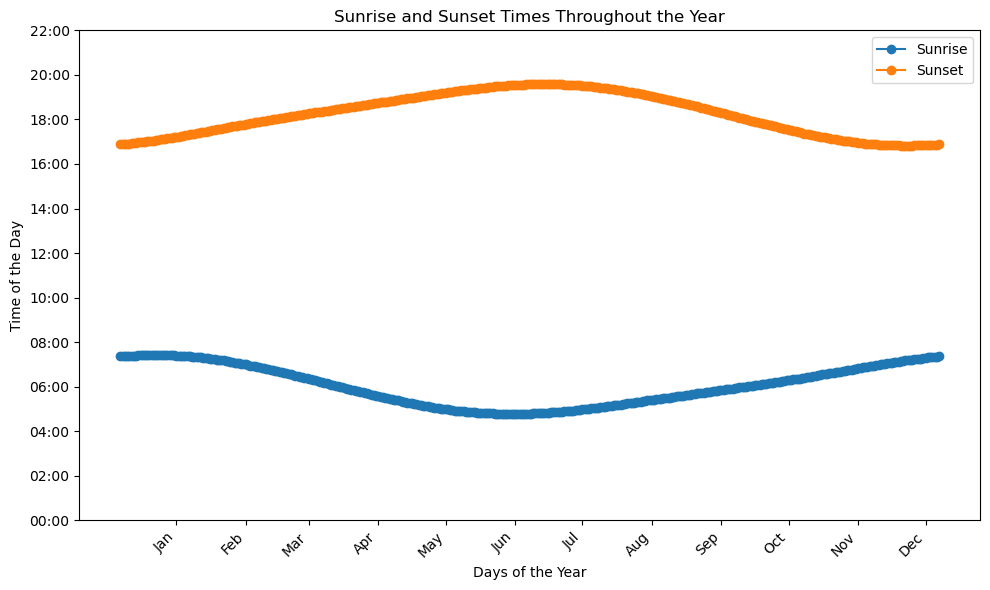

In [61]:
sunrise_times = pd.to_datetime(sunrise_times)
sunset_times = pd.to_datetime(sunset_times)

# Create a range of dates for the x-axis
dates = pd.date_range(start="2022-12-21", end="2023-12-21", freq="D")

# Create a plot
plt.figure(figsize=(10, 6))

# Plot sunrise times
plt.plot(dates, sunrise_times, label="Sunrise", marker='o')

# Plot sunset times
plt.plot(dates, sunset_times, label="Sunset", marker='o')

# Customize the x-axis ticks
first_of_month = pd.date_range(start="2023-01-01", end="2023-12-31", freq="MS")
tick_positions = [date for date in dates if date.day == 15]
tick_labels = [date.strftime("%b") for date in first_of_month]

plt.xticks(tick_positions, tick_labels)

# Customize the y-axis
plt.yticks(pd.date_range("00:00", "23:59", freq="2H"), [time.strftime("%H:%M") for time in pd.date_range("00:00", "23:59", freq="2H")])

# Set labels and title
plt.xlabel("Days of the Year")
plt.ylabel("Time of the Day")
plt.title("Sunrise and Sunset Times Throughout the Year")

# Add legend
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
#ground freezing another plot or highlight in temperature plot

# PROJECTION DATA

In [ ]:
c = cdsapi.Client()

c.retrieve(
    'projections-cmip6',
    {
        'format': 'zip',
        'temporal_resolution': 'monthly',
        'experiment': 'ssp2_4_5',
        'variable': 'air_temperature',
        'level': '1000',
        'model': 'cmcc_esm2',
        'year': [
            '2023', '2026', '2027',
            '2029', '2030', '2033',
            '2034', '2036',
        ],
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
        'area': [
            90, -180, -90,
            180,
        ],
    },
    'download.zip')